In [26]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [46]:
# S&P500 = '^GSPC', NASDAQ = '^IXIC', German DAX = '^GDAXI', London FTSE = '^FTSE'/ Russell 2000 = '^RUT'
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^RUT']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '1997-1-1')['Adj Close']

In [47]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5512 entries, 1997-01-02 to 2018-11-23
Data columns (total 4 columns):
^GSPC     5512 non-null float64
^IXIC     5512 non-null float64
^GDAXI    5414 non-null float64
^RUT      5512 non-null float64
dtypes: float64(4)
memory usage: 215.3 KB


In [48]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^RUT
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,358.959991
1997-01-03,748.030029,1310.680054,2863.260010,361.850006
1997-01-06,747.650024,1316.400024,2890.199951,362.309998
1997-01-07,753.229980,1327.729980,2876.340088,364.160004
1997-01-08,748.409973,1320.349976,2904.080078,364.170013


In [49]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^RUT
Date,,,,
2018-11-16,2736.270020,7247.870117,11341.000000,1527.530029
2018-11-19,2690.729980,7028.479980,11244.540039,1496.540039
2018-11-20,2641.889893,6908.819824,11066.410156,1469.010010
2018-11-21,2649.929932,6972.250000,11244.169922,1488.280029
2018-11-23,2632.560059,6938.979980,11192.690430,1488.680054


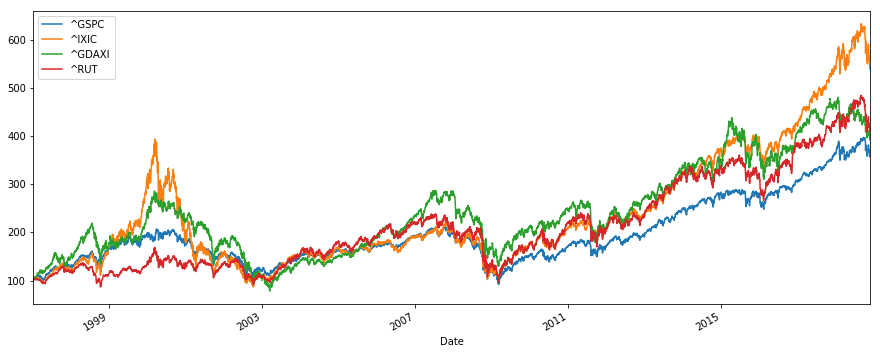

In [50]:
# Normalizing to 100 and plotting the graph

(ind_data / ind_data.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In [51]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^RUT
Date,,,,
2018-11-16,0.002223,-0.001537,-0.001116,0.002237
2018-11-19,-0.016643,-0.030270,-0.008505,-0.020288
2018-11-20,-0.018151,-0.017025,-0.015841,-0.018396
2018-11-21,0.003043,0.009181,0.016063,0.013118
2018-11-23,-0.006555,-0.004772,-0.004578,0.000269


In [52]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.075797
^IXIC     0.107763
^GDAXI    0.075011
^RUT      0.090534
dtype: float64

In [54]:
# Comparing the Ajusting closing price of Proctle & Gamble with one of the indices
tickers = ['PG', '^GSPC', '^DJI']

ind_data2 = pd.DataFrame()

for t in tickers:
    ind_data2[t] = wb.DataReader(t, data_source = 'yahoo', start = '2001-1-1') ['Adj Close']

In [55]:
ind_data2.tail()

,PG,^GSPC,^DJI
Date,,,
2018-11-16,93.820000,2736.270020,25413.220703
2018-11-19,93.290001,2690.729980,25017.439453
2018-11-20,92.099998,2641.889893,24465.640625
2018-11-21,91.410004,2649.929932,24464.689453
2018-11-23,91.540001,2632.560059,24285.949219


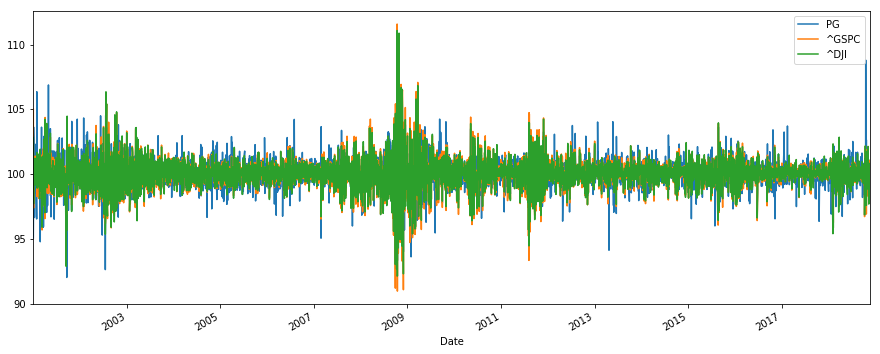

In [56]:
# Normalizing to 100 and plotting the graph

(ind_data2 / ind_data2.shift(1) * 100).plot(figsize = (15, 6))
plt.show()